In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from mnist import MNIST
data = MNIST(data_dir="data/MNIST/")

In [11]:
x_train = data.x_train
y_train_cls = data.y_train_cls
x_test = data.x_test
y_test_cls = data.y_test_cls

In [4]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(x_train)
print(standardized_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

# configuring the parameteres
# the number of components = 2
pca.n_components = 500
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (55000, 500)


In [24]:
from sklearn.linear_model import LogisticRegression

# saga stands for "Stochastic Average Gradient descent solver".

clf = LogisticRegression(random_state=0, solver='saga', multi_class='multinomial', ).fit(pca_data, y_train_cls)

C:\Users\heman\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [25]:
# Data-preprocessing: Standardizing the test data

from sklearn.preprocessing import StandardScaler
standardized_test_data = StandardScaler().fit_transform(x_test)
print(standardized_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
# Reducing the dimension of the test data using pca.


pca_test_data = pca.fit_transform(standardized_test_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_test_data.shape)

shape of pca_reduced.shape =  (10000, 500)


In [27]:
clf.score(pca_test_data, y_test_cls)

0.502

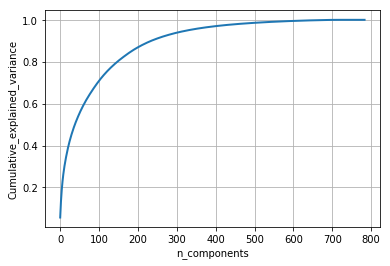

In [30]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(standardized_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.